In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score,precision_score,recall_score
import gc
import warnings
warnings.filterwarnings("ignore")
gc.enable()

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
cd 'drive/My Drive/feature file'

/content/drive/My Drive/feature file


In [3]:
#https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def memory_decrease_by_column(df):
  '''This function helps to reduce the memory taken by the dataframe by storing the data in data types of best fit'''
  
  col_type_dict={'order_id':np.uint32,'user_id':np.uint32,'order_number':np.uint8,
                 'order_dow':np.uint8,'order_hour_of_day':np.uint8,'days_since_prior_order':np.float16,
                 'product_id':np.uint16,'add_to_cart_order':np.uint8,'reordered':np.uint8,
                 'aisle_id':np.uint8,'department_id':np.uint8,'reordered_new':np.uint8,
                 'user_max_ono':np.uint8,'user_sum_reord':np.uint16,'user_reord_prop':np.float16,
                  'user_prod_reord_prop':np.float16,'user_uniqpr':np.uint16,'user_uniqpr_prop':np.float16,
                  'user_order_reord_prop':np.float16,'user_dsp_mean':np.float16,'user_min_order_size':np.uint8,
                  'user_max_order_size':np.uint8,'user_mean_order_size':np.float16,
                  'product_ratios_users_oneshot':np.float16,'product_cart_mean':np.float16,
                  'product_reord_count':np.uint32,'product_reord_prop':np.float16,
                  'prod_uniq_us':np.uint32,'prod_uniq_us_prop':np.float16,
                  'prod_us_reord_prop':np.float16,'user_days_since_product':np.float16,'user_product_hod_mean':np.float16,
'user_product_dow_mean':np.float16,'user_product_prop':np.float16,
'user_product_cnt':np.uint8,'user_product_atc_mode_min':np.uint8,
'user_product_atc_mode_max':np.uint8,'user_product_atc_min':np.uint8,
'user_product_atc_max':np.uint8,'user_product_atc_mean':np.float16,
'aisle_reordered':np.uint32,'aisle_reordered_prop':np.float16,
'dep_reordered':np.uint32,'dep_reordered_prop':np.float16,
'order_dow_reordered':np.uint32,'order_dow_reordered_prop':np.float16,
'order_hod_reordered':np.uint32,'order_hod_reordered_prop':np.float16,
'order_dow_hod_reord_count':np.uint32,'ono_dsp_reord':np.uint32,
'order_dow_hod_reord_prop':np.float16,'ono_dsp_reord_prop':np.float16,
'atc_reordered_prop':np.float16,'product_ordered_today':np.uint8,
'user_days_since_product_corrected':np.float16}

  start_mem = df.memory_usage().sum() / 1024**2
  print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
  for i in df.columns:
    if df[i].dtype!= object:
      df[i]=df[i].astype(col_type_dict[i])
    else:
      df[i] = df[i].astype('category')
  end_mem = df.memory_usage().sum() / 1024**2
  print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
  print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
  return df


In [ ]:
#loading orders data from disk
orders=pd.read_csv('orders.csv')
print(orders.shape)
print(orders.head())

(3421083, 7)
   order_id  user_id  ... order_hour_of_day  days_since_prior_order
0   2539329        1  ...                 8                     NaN
1   2398795        1  ...                 7                    15.0
2    473747        1  ...                12                    21.0
3   2254736        1  ...                 7                    29.0
4    431534        1  ...                15                    28.0

[5 rows x 7 columns]


In [ ]:
#reducing memory taken by orders
orders=memory_decrease_by_column(orders)

Memory usage of dataframe is 182.71 MB
Memory usage after optimization is: 45.68 MB
Decreased by 75.0%


In [ ]:
#loading order_product_prior data from the disk
order_products_prior=pd.read_csv('order_products__prior.csv')
print(order_products_prior.shape)
print(order_products_prior.head(2))

(32434489, 4)
   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1


In [ ]:
#reducing memory of order_products__prior
order_products_prior=memory_decrease_by_column(order_products_prior)

Memory usage of dataframe is 989.82 MB
Memory usage after optimization is: 247.46 MB
Decreased by 75.0%


In [ ]:
#loading order_products_train data from disk
order_products_train=pd.read_csv('order_products__train.csv')
print(order_products_train.shape)
print(order_products_train.head(2))

(1384617, 4)
   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1


In [ ]:
#reducing memory of order_products_train
order_products_train=memory_decrease_by_column(order_products_train)

Memory usage of dataframe is 42.26 MB
Memory usage after optimization is: 10.56 MB
Decreased by 75.0%


In [ ]:
#loading products data from disk
products=pd.read_csv('products.csv')
products.drop(['product_name'],axis=1,inplace=True)
print(products.shape)
print(products.head())
print(products.dtypes)

(49688, 3)
   product_id  aisle_id  department_id
0           1        61             19
1           2       104             13
2           3        94              7
3           4        38              1
4           5         5             13
product_id       int64
aisle_id         int64
department_id    int64
dtype: object


In [ ]:
#reducing memory of products
products=memory_decrease_by_column(products)

Memory usage of dataframe is 1.14 MB
Memory usage after optimization is: 0.19 MB
Decreased by 83.3%


In [ ]:
#combining user_order and order_product information for prior data
user_order_products_prior=pd.merge(orders[orders.eval_set=='prior'],order_products_prior,on='order_id',how='left')
user_order_products_prior.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered'],
      dtype='object')

In [ ]:
#extracting user and previous products of the user
user_products_prior=user_order_products_prior[['user_id','product_id']].drop_duplicates()

In [ ]:
#combing user_order and order_product information for train data
user_order=pd.merge(orders[orders.eval_set=='train'],order_products_train,on='order_id',how='left')
print(user_order.shape)
print(user_order.head(2))

(1384617, 10)
   order_id  user_id eval_set  ...  product_id  add_to_cart_order  reordered
0   1187899        1    train  ...         196                  1          1
1   1187899        1    train  ...       25133                  2          1

[2 rows x 10 columns]


In [ ]:
#dropping unnecessary columns from user_order
user_order.drop(['add_to_cart_order','reordered'],axis=1,inplace=True)

In [ ]:
#extracting list of products for a user in train data
us_ono_pro=user_order.groupby('user_id')['product_id'].agg(list).reset_index()
us_ono_pro.columns=['user_id','train_products']
us_ono_pro.head(2)

,user_id,train_products
0,1,"[196, 25133, 38928, 26405, 39657, 10258, 13032..."
1,2,"[22963, 7963, 16589, 32792, 41787, 22825, 1364..."


In [ ]:
#merging all products for a user in train data
user_order_train_products=pd.merge(user_order.drop(['product_id'],axis=1).drop_duplicates(),us_ono_pro,on=['user_id'],how='left')
user_order_train_products.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'train_products'],
      dtype='object')

In [ ]:
#preparing the train data set, imitating the test scenario
user_order_products_prior_train1=pd.merge(user_order_train_products.drop(['eval_set'],axis=1),user_products_prior,on='user_id',how='left')
print(user_order_products_prior_train1.shape)
print(user_order_products_prior_train1.columns)

(8474661, 8)
Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'train_products', 'product_id'],
      dtype='object')


In [ ]:
#calculating reordered_new, the label for the train data
from tqdm import tqdm
tqdm.pandas()
user_order_products_prior_train1['reordered_new']=user_order_products_prior_train1.progress_apply(lambda x: 1 if x.product_id in x.train_products else 0,axis=1)

100%|██████████| 8474661/8474661 [02:31<00:00, 55974.96it/s]


In [ ]:
#reducing memory of user_order_products_prior_train1
user_order_products_prior_train1=memory_decrease_by_column(user_order_products_prior_train1.drop(['train_products'],axis=1))

Memory usage of dataframe is 250.54 MB
Memory usage after optimization is: 193.97 MB
Decreased by 22.6%


In [ ]:
#performing garbage collection
gc.collect()

0

In [ ]:
#loading user_features from disk
user_features=pd.read_csv('user_features.csv')
print(user_features.shape)
print(user_features.head(2))
print(user_features.dtypes)

(206209, 12)
   user_id  user_max_ono  ...  user_max_order_size  user_mean_order_size
0        1            10  ...                    9              5.900000
1        2            14  ...                   26             13.928571

[2 rows x 12 columns]
user_id                    int64
user_max_ono               int64
user_sum_reord             int64
user_reord_prop          float64
user_prod_reord_prop     float64
user_uniqpr                int64
user_uniqpr_prop         float64
user_order_reord_prop    float64
user_dsp_mean            float64
user_min_order_size        int64
user_max_order_size        int64
user_mean_order_size     float64
dtype: object


In [ ]:
#reducing memory of user_features
user_features=memory_decrease_by_column(user_features)

Memory usage of dataframe is 18.88 MB
Memory usage after optimization is: 4.52 MB
Decreased by 76.0%


In [ ]:
#merging user_features with the train data
user_order_products_prior_train1=pd.merge(user_order_products_prior_train1,user_features,on=['user_id'],how='left')
user_order_products_prior_train1.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'reordered_new', 'user_max_ono',
       'user_sum_reord', 'user_reord_prop', 'user_prod_reord_prop',
       'user_uniqpr', 'user_uniqpr_prop', 'user_order_reord_prop',
       'user_dsp_mean', 'user_min_order_size', 'user_max_order_size',
       'user_mean_order_size'],
      dtype='object')

In [ ]:
#loading product_features from disk
product_features=pd.read_csv('product_features.csv')
product_features.columns

Index(['product_id', 'product_ratios_users_oneshot', 'product_cart_mean',
       'product_reord_count', 'product_reord_prop', 'prod_uniq_us',
       'prod_uniq_us_prop', 'prod_us_reord_prop'],
      dtype='object')

In [ ]:
#reducing memory of product_features
product_features=memory_decrease_by_column(product_features)

Memory usage of dataframe is 3.03 MB
Memory usage after optimization is: 0.95 MB
Decreased by 68.7%


In [ ]:
#merging product_features with existing train data
user_order_products_prior_train1=pd.merge(user_order_products_prior_train1,product_features,on=['product_id'],how='left')
user_order_products_prior_train1.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'reordered_new', 'user_max_ono',
       'user_sum_reord', 'user_reord_prop', 'user_prod_reord_prop',
       'user_uniqpr', 'user_uniqpr_prop', 'user_order_reord_prop',
       'user_dsp_mean', 'user_min_order_size', 'user_max_order_size',
       'user_mean_order_size', 'product_ratios_users_oneshot',
       'product_cart_mean', 'product_reord_count', 'product_reord_prop',
       'prod_uniq_us', 'prod_uniq_us_prop', 'prod_us_reord_prop'],
      dtype='object')

In [ ]:
#loading user_product_features from disk
user_product_features=pd.read_csv('user_product_features.csv')
user_product_features.columns

Index(['user_id', 'product_id', 'user_days_since_product',
       'user_product_hod_mean', 'user_product_dow_mean', 'user_product_prop',
       'user_product_cnt', 'user_product_atc_mode_min',
       'user_product_atc_mode_max', 'user_product_atc_min',
       'user_product_atc_max', 'user_product_atc_mean'],
      dtype='object')

In [ ]:
#reducing memory of user_product_features
user_product_features=memory_decrease_by_column(user_product_features)

Memory usage of dataframe is 1218.38 MB
Memory usage after optimization is: 266.52 MB
Decreased by 78.1%


In [ ]:
#merging user_product_features with existing data
user_order_products_prior_train1=pd.merge(user_order_products_prior_train1,user_product_features,on=['user_id','product_id'],how='left')
user_order_products_prior_train1.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'reordered_new', 'user_max_ono',
       'user_sum_reord', 'user_reord_prop', 'user_prod_reord_prop',
       'user_uniqpr', 'user_uniqpr_prop', 'user_order_reord_prop',
       'user_dsp_mean', 'user_min_order_size', 'user_max_order_size',
       'user_mean_order_size', 'product_ratios_users_oneshot',
       'product_cart_mean', 'product_reord_count', 'product_reord_prop',
       'prod_uniq_us', 'prod_uniq_us_prop', 'prod_us_reord_prop',
       'user_days_since_product', 'user_product_hod_mean',
       'user_product_dow_mean', 'user_product_prop', 'user_product_cnt',
       'user_product_atc_mode_min', 'user_product_atc_mode_max',
       'user_product_atc_min', 'user_product_atc_max',
       'user_product_atc_mean'],
      dtype='object')

In [ ]:
#loading aisle_features from disk
aisle_features=pd.read_csv('aisle_features.csv')
aisle_features.columns

Index(['aisle_id', 'aisle_reordered', 'aisle_reordered_prop'], dtype='object')

In [ ]:
#reducing memory of aisle_features
aisle_features=memory_decrease_by_column(aisle_features)

Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by 68.1%


In [ ]:
#merging products with existing data
user_order_products_prior_train1=pd.merge(user_order_products_prior_train1,products,on='product_id',how='left')
user_order_products_prior_train1.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'reordered_new', 'user_max_ono',
       'user_sum_reord', 'user_reord_prop', 'user_prod_reord_prop',
       'user_uniqpr', 'user_uniqpr_prop', 'user_order_reord_prop',
       'user_dsp_mean', 'user_min_order_size', 'user_max_order_size',
       'user_mean_order_size', 'product_ratios_users_oneshot',
       'product_cart_mean', 'product_reord_count', 'product_reord_prop',
       'prod_uniq_us', 'prod_uniq_us_prop', 'prod_us_reord_prop',
       'user_days_since_product', 'user_product_hod_mean',
       'user_product_dow_mean', 'user_product_prop', 'user_product_cnt',
       'user_product_atc_mode_min', 'user_product_atc_mode_max',
       'user_product_atc_min', 'user_product_atc_max', 'user_product_atc_mean',
       'aisle_id', 'department_id'],
      dtype='object')

In [ ]:
#merging aisle_features with existing data
user_order_products_prior_train1=pd.merge(user_order_products_prior_train1,aisle_features,on=['aisle_id'],how='left')
user_order_products_prior_train1.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'reordered_new', 'user_max_ono',
       'user_sum_reord', 'user_reord_prop', 'user_prod_reord_prop',
       'user_uniqpr', 'user_uniqpr_prop', 'user_order_reord_prop',
       'user_dsp_mean', 'user_min_order_size', 'user_max_order_size',
       'user_mean_order_size', 'product_ratios_users_oneshot',
       'product_cart_mean', 'product_reord_count', 'product_reord_prop',
       'prod_uniq_us', 'prod_uniq_us_prop', 'prod_us_reord_prop',
       'user_days_since_product', 'user_product_hod_mean',
       'user_product_dow_mean', 'user_product_prop', 'user_product_cnt',
       'user_product_atc_mode_min', 'user_product_atc_mode_max',
       'user_product_atc_min', 'user_product_atc_max', 'user_product_atc_mean',
       'aisle_id', 'department_id', 'aisle_reordered', 'aisle_reordered_prop'],
      dtype='object')

In [ ]:
#loading department features from disk
dep_features=pd.read_csv('dep_features.csv')
dep_features.columns

Index(['department_id', 'dep_reordered', 'dep_reordered_prop'], dtype='object')

In [ ]:
#reducing memory of dep features
dep_features=memory_decrease_by_column(dep_features)

Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by 56.5%


In [ ]:
#merging dep features with existing data
user_order_products_prior_train1=pd.merge(user_order_products_prior_train1,dep_features,on=['department_id'],how='left')
user_order_products_prior_train1.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'reordered_new', 'user_max_ono',
       'user_sum_reord', 'user_reord_prop', 'user_prod_reord_prop',
       'user_uniqpr', 'user_uniqpr_prop', 'user_order_reord_prop',
       'user_dsp_mean', 'user_min_order_size', 'user_max_order_size',
       'user_mean_order_size', 'product_ratios_users_oneshot',
       'product_cart_mean', 'product_reord_count', 'product_reord_prop',
       'prod_uniq_us', 'prod_uniq_us_prop', 'prod_us_reord_prop',
       'user_days_since_product', 'user_product_hod_mean',
       'user_product_dow_mean', 'user_product_prop', 'user_product_cnt',
       'user_product_atc_mode_min', 'user_product_atc_mode_max',
       'user_product_atc_min', 'user_product_atc_max', 'user_product_atc_mean',
       'aisle_id', 'department_id', 'aisle_reordered', 'aisle_reordered_prop',
       'dep_reordered', 'dep_reordered_prop'],
      dtype='object')

In [ ]:
#loading add_to_cart_order features from disk
atc_features=pd.read_csv('atc_features.csv',usecols=['add_to_cart_order','atc_reordered_prop'])
atc_features.columns=['user_product_atc_mode_min','atc_reordered_prop']
atc_features.columns

Index(['user_product_atc_mode_min', 'atc_reordered_prop'], dtype='object')

In [ ]:
#reducing memory of atc_features
atc_features=memory_decrease_by_column(atc_features)

Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by 77.0%


In [ ]:
#merging atc_features with existing data
user_order_products_prior_train1=pd.merge(user_order_products_prior_train1,atc_features,on=['user_product_atc_mode_min'],how='left')
user_order_products_prior_train1.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'reordered_new', 'user_max_ono',
       'user_sum_reord', 'user_reord_prop', 'user_prod_reord_prop',
       'user_uniqpr', 'user_uniqpr_prop', 'user_order_reord_prop',
       'user_dsp_mean', 'user_min_order_size', 'user_max_order_size',
       'user_mean_order_size', 'product_ratios_users_oneshot',
       'product_cart_mean', 'product_reord_count', 'product_reord_prop',
       'prod_uniq_us', 'prod_uniq_us_prop', 'prod_us_reord_prop',
       'user_days_since_product', 'user_product_hod_mean',
       'user_product_dow_mean', 'user_product_prop', 'user_product_cnt',
       'user_product_atc_mode_min', 'user_product_atc_mode_max',
       'user_product_atc_min', 'user_product_atc_max', 'user_product_atc_mean',
       'aisle_id', 'department_id', 'aisle_reordered', 'aisle_reordered_prop',
       'dep_reordered', 'dep_reordered_prop', 'atc_reordered_prop'],
      dt

In [ ]:
#loading order_dow features from disk
order_dow_features=pd.read_csv('order_dow_features.csv')
order_dow_features.columns

Index(['order_dow', 'order_dow_reordered', 'order_dow_reordered_prop'], dtype='object')

In [ ]:
#reducing memory of order_dow features
order_dow_features=memory_decrease_by_column(order_dow_features)

Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by 40.2%


In [ ]:
#merging order_dow features with existing data
user_order_products_prior_train1=pd.merge(user_order_products_prior_train1,order_dow_features,on=['order_dow'],how='left')
user_order_products_prior_train1.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'reordered_new', 'user_max_ono',
       'user_sum_reord', 'user_reord_prop', 'user_prod_reord_prop',
       'user_uniqpr', 'user_uniqpr_prop', 'user_order_reord_prop',
       'user_dsp_mean', 'user_min_order_size', 'user_max_order_size',
       'user_mean_order_size', 'product_ratios_users_oneshot',
       'product_cart_mean', 'product_reord_count', 'product_reord_prop',
       'prod_uniq_us', 'prod_uniq_us_prop', 'prod_us_reord_prop',
       'user_days_since_product', 'user_product_hod_mean',
       'user_product_dow_mean', 'user_product_prop', 'user_product_cnt',
       'user_product_atc_mode_min', 'user_product_atc_mode_max',
       'user_product_atc_min', 'user_product_atc_max', 'user_product_atc_mean',
       'aisle_id', 'department_id', 'aisle_reordered', 'aisle_reordered_prop',
       'dep_reordered', 'dep_reordered_prop', 'atc_reordered_prop',
       'o

In [ ]:
#loading order_hour_of_day features from disk
order_hod_features=pd.read_csv('order_hod_features.csv')
order_hod_features.columns

Index(['order_hour_of_day', 'order_hod_reordered', 'order_hod_reordered_prop'], dtype='object')

In [ ]:
#reducing memory of order_hod_features
order_hod_features=memory_decrease_by_column(order_hod_features)

Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by 58.0%


In [ ]:
#merging order_hod features with existing data
user_order_products_prior_train1=pd.merge(user_order_products_prior_train1,order_hod_features,on=['order_hour_of_day'],how='left')
user_order_products_prior_train1.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'reordered_new', 'user_max_ono',
       'user_sum_reord', 'user_reord_prop', 'user_prod_reord_prop',
       'user_uniqpr', 'user_uniqpr_prop', 'user_order_reord_prop',
       'user_dsp_mean', 'user_min_order_size', 'user_max_order_size',
       'user_mean_order_size', 'product_ratios_users_oneshot',
       'product_cart_mean', 'product_reord_count', 'product_reord_prop',
       'prod_uniq_us', 'prod_uniq_us_prop', 'prod_us_reord_prop',
       'user_days_since_product', 'user_product_hod_mean',
       'user_product_dow_mean', 'user_product_prop', 'user_product_cnt',
       'user_product_atc_mode_min', 'user_product_atc_mode_max',
       'user_product_atc_min', 'user_product_atc_max', 'user_product_atc_mean',
       'aisle_id', 'department_id', 'aisle_reordered', 'aisle_reordered_prop',
       'dep_reordered', 'dep_reordered_prop', 'atc_reordered_prop',
       'o

In [ ]:
#loading order_dow, order_hour_of_day features from disk
order_dow_hod_features=pd.read_csv('order_dow_hod_features.csv')
order_dow_hod_features.columns

Index(['order_dow', 'order_hour_of_day', 'order_dow_hod_reord_count',
       'order_dow_hod_reord_prop'],
      dtype='object')

In [ ]:
#reducing memory of order_dow_hod_features
order_dow_hod_features=memory_decrease_by_column(order_dow_hod_features)

Memory usage of dataframe is 0.01 MB
Memory usage after optimization is: 0.00 MB
Decreased by 73.3%


In [ ]:
#merging order_dow_hod_features with existing data
user_order_products_prior_train1=pd.merge(user_order_products_prior_train1,order_dow_hod_features,on=['order_dow','order_hour_of_day'],how='left')
user_order_products_prior_train1.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'reordered_new', 'user_max_ono',
       'user_sum_reord', 'user_reord_prop', 'user_prod_reord_prop',
       'user_uniqpr', 'user_uniqpr_prop', 'user_order_reord_prop',
       'user_dsp_mean', 'user_min_order_size', 'user_max_order_size',
       'user_mean_order_size', 'product_ratios_users_oneshot',
       'product_cart_mean', 'product_reord_count', 'product_reord_prop',
       'prod_uniq_us', 'prod_uniq_us_prop', 'prod_us_reord_prop',
       'user_days_since_product', 'user_product_hod_mean',
       'user_product_dow_mean', 'user_product_prop', 'user_product_cnt',
       'user_product_atc_mode_min', 'user_product_atc_mode_max',
       'user_product_atc_min', 'user_product_atc_max', 'user_product_atc_mean',
       'aisle_id', 'department_id', 'aisle_reordered', 'aisle_reordered_prop',
       'dep_reordered', 'dep_reordered_prop', 'atc_reordered_prop',
       'o

In [ ]:
#loading order_number, days_since_prior_order_features from disk
ono_dsp_features=pd.read_csv('ono_dsp_features.csv')
ono_dsp_features.columns

Index(['order_number', 'days_since_prior_order', 'ono_dsp_reord',
       'ono_dsp_reord_prop'],
      dtype='object')

In [ ]:
#reducing memory of ono_dsp_features
ono_dsp_features=memory_decrease_by_column(ono_dsp_features)

Memory usage of dataframe is 0.09 MB
Memory usage after optimization is: 0.02 MB
Decreased by 71.8%


In [ ]:
#merging ono_dsp_features with existing data
user_order_products_prior_train1=pd.merge(user_order_products_prior_train1,ono_dsp_features,on=['order_number','days_since_prior_order'],how='left')
user_order_products_prior_train1.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'reordered_new', 'user_max_ono',
       'user_sum_reord', 'user_reord_prop', 'user_prod_reord_prop',
       'user_uniqpr', 'user_uniqpr_prop', 'user_order_reord_prop',
       'user_dsp_mean', 'user_min_order_size', 'user_max_order_size',
       'user_mean_order_size', 'product_ratios_users_oneshot',
       'product_cart_mean', 'product_reord_count', 'product_reord_prop',
       'prod_uniq_us', 'prod_uniq_us_prop', 'prod_us_reord_prop',
       'user_days_since_product', 'user_product_hod_mean',
       'user_product_dow_mean', 'user_product_prop', 'user_product_cnt',
       'user_product_atc_mode_min', 'user_product_atc_mode_max',
       'user_product_atc_min', 'user_product_atc_max', 'user_product_atc_mean',
       'aisle_id', 'department_id', 'aisle_reordered', 'aisle_reordered_prop',
       'dep_reordered', 'dep_reordered_prop', 'atc_reordered_prop',
       'o

In [ ]:
#calulcating the correct days_since_product for a user and whether the product was ordered today by user feature
user_order_products_prior_train1['user_days_since_product_corrected']=user_order_products_prior_train1['user_days_since_product']+user_order_products_prior_train1['days_since_prior_order']
user_order_products_prior_train1['product_ordered_today']=user_order_products_prior_train1['user_days_since_product_corrected'].apply(lambda x: 1 if x==0 else 0)
user_order_products_prior_train1.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'reordered_new', 'user_max_ono',
       'user_sum_reord', 'user_reord_prop', 'user_prod_reord_prop',
       'user_uniqpr', 'user_uniqpr_prop', 'user_order_reord_prop',
       'user_dsp_mean', 'user_min_order_size', 'user_max_order_size',
       'user_mean_order_size', 'product_ratios_users_oneshot',
       'product_cart_mean', 'product_reord_count', 'product_reord_prop',
       'prod_uniq_us', 'prod_uniq_us_prop', 'prod_us_reord_prop',
       'user_days_since_product', 'user_product_hod_mean',
       'user_product_dow_mean', 'user_product_prop', 'user_product_cnt',
       'user_product_atc_mode_min', 'user_product_atc_mode_max',
       'user_product_atc_min', 'user_product_atc_max', 'user_product_atc_mean',
       'aisle_id', 'department_id', 'aisle_reordered', 'aisle_reordered_prop',
       'dep_reordered', 'dep_reordered_prop', 'atc_reordered_prop',
       'o

In [ ]:
#reducing memory of product_ordered_today
user_order_products_prior_train1.product_ordered_today=user_order_products_prior_train1.product_ordered_today.astype(np.uint8)

In [ ]:
#filling nan with 0
user_order_products_prior_train1.fillna(0,inplace=True)

In [ ]:
#reducing memory of user_order_products_prior_train1
user_order_products_prior_train1=memory_decrease_by_column(user_order_products_prior_train1)

Memory usage of dataframe is 994.09 MB
Memory usage after optimization is: 961.77 MB
Decreased by 3.3%


In [ ]:
#saving entire data to disk
user_order_products_prior_train1.to_csv('all_features_combined.csv',index=False)

In [4]:
#loading data from disk
user_order_products_prior_train1=pd.read_csv('all_features_combined.csv')
user_order_products_prior_train1.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'reordered_new', 'user_max_ono',
       'user_sum_reord', 'user_reord_prop', 'user_prod_reord_prop',
       'user_uniqpr', 'user_uniqpr_prop', 'user_order_reord_prop',
       'user_dsp_mean', 'user_min_order_size', 'user_max_order_size',
       'user_mean_order_size', 'product_ratios_users_oneshot',
       'product_cart_mean', 'product_reord_count', 'product_reord_prop',
       'prod_uniq_us', 'prod_uniq_us_prop', 'prod_us_reord_prop',
       'user_days_since_product', 'user_product_hod_mean',
       'user_product_dow_mean', 'user_product_prop', 'user_product_cnt',
       'user_product_atc_mode_min', 'user_product_atc_mode_max',
       'user_product_atc_min', 'user_product_atc_max', 'user_product_atc_mean',
       'aisle_id', 'department_id', 'aisle_reordered', 'aisle_reordered_prop',
       'dep_reordered', 'dep_reordered_prop', 'atc_reordered_prop',
       'o

In [5]:
#reducing memory of user_order_products_prior_train1
user_order_products_prior_train1=memory_decrease_by_column(user_order_products_prior_train1)

Memory usage of dataframe is 3426.80 MB
Memory usage after optimization is: 897.11 MB
Decreased by 73.8%


In [ ]:
#splitting users randomly into train_users and cv_users
import random
user_ids=list(set(user_order_products_prior_train1.user_id))
random.shuffle(user_ids)
train_users=user_ids[:120000]
cv_users=user_ids[120000:]
print(len(user_ids),len(train_users),len(cv_users))

In [ ]:
#saving train and cv users to disk
train_users_df=pd.DataFrame({'train_users':train_users}).to_csv('train_users.csv',index=False)
cv_users_df=pd.DataFrame({'cv_users':cv_users}).to_csv('cv_users.csv',index=False)

In [6]:
#loading train and cv users from disk
train_users=pd.read_csv('train_users.csv')
train_users=train_users.train_users
cv_users=pd.read_csv('cv_users.csv')
cv_users=cv_users.cv_users

In [7]:
#seperating train and cv data based on user id
train_data=user_order_products_prior_train1[user_order_products_prior_train1.user_id.isin(train_users)]
cv_data=user_order_products_prior_train1[user_order_products_prior_train1.user_id.isin(cv_users)]

In [8]:
#preparing train and cv features and label data
id_columns=['order_id','user_id','product_id','aisle_id','department_id']
useless_columns=['reordered_new']
X_train=train_data.drop(id_columns+useless_columns,axis=1)
y_train=train_data['reordered_new']
X_cv=cv_data[X_train.columns]
y_cv=cv_data['reordered_new']

In [9]:
#extracting max and min of each feature of train data
X_train_min=X_train.min(axis=0)
X_train_max=X_train.max(axis=0)
X_train_max_min=X_train_max-X_train_min


In [10]:
#performing min-max normalization on  train data and cv data
X_train=(X_train-X_train_min)/(X_train_max_min)
X_cv=(X_cv-X_train_min)/(X_train_max_min)

In [11]:
#checking for nulls
X_train.isnull().any().any(),X_cv.isnull().any().any()

(False, False)

In [12]:
#garbage collection
gc.collect()

11

In [ ]:
#checking balance of the data
y_train.value_counts()

0    6997130
1     758820
Name: reordered_new, dtype: int64

**Logistic Regression**

In [ ]:
#performing RandomizedSearchcv with logistic regression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
params={
    'C':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000],
     'class_weight':[1,5,10,50,100,200,500,1000]
  
}
logreg=LogisticRegression(max_iter=500)
random_cfl=RandomizedSearchCV(logreg,param_distributions=params,verbose=10,n_jobs=1,scoring='f1')
random_cfl.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] class_weight=5, C=0.001 .........................................
[CV] ............. class_weight=5, C=0.001, score=0.127, total= 2.1min
[CV] class_weight=5, C=0.001 .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min remaining:    0.0s


[CV] ............. class_weight=5, C=0.001, score=0.122, total= 1.9min
[CV] class_weight=5, C=0.001 .........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.0min remaining:    0.0s


[CV] ............. class_weight=5, C=0.001, score=0.128, total= 2.4min
[CV] class_weight=5, C=0.001 .........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  6.4min remaining:    0.0s


[CV] ............. class_weight=5, C=0.001, score=0.122, total= 1.8min
[CV] class_weight=5, C=0.001 .........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  8.3min remaining:    0.0s


[CV] ............. class_weight=5, C=0.001, score=0.123, total= 2.0min
[CV] class_weight=50, C=0.01 .........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 10.3min remaining:    0.0s


[CV] ............. class_weight=50, C=0.01, score=0.188, total= 4.3min
[CV] class_weight=50, C=0.01 .........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 14.6min remaining:    0.0s


[CV] ............. class_weight=50, C=0.01, score=0.183, total= 6.3min
[CV] class_weight=50, C=0.01 .........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 20.9min remaining:    0.0s


[CV] ............. class_weight=50, C=0.01, score=0.188, total= 4.9min
[CV] class_weight=50, C=0.01 .........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 25.8min remaining:    0.0s


[CV] ............. class_weight=50, C=0.01, score=0.181, total= 5.2min
[CV] class_weight=50, C=0.01 .........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 31.0min remaining:    0.0s


[CV] ............. class_weight=50, C=0.01, score=0.184, total= 5.4min
[CV] class_weight=50, C=1e-05 ........................................
[CV] ............ class_weight=50, C=1e-05, score=0.000, total=  23.9s
[CV] class_weight=50, C=1e-05 ........................................
[CV] ............ class_weight=50, C=1e-05, score=0.000, total=  24.3s
[CV] class_weight=50, C=1e-05 ........................................
[CV] ............ class_weight=50, C=1e-05, score=0.000, total=  24.8s
[CV] class_weight=50, C=1e-05 ........................................
[CV] ............ class_weight=50, C=1e-05, score=0.000, total=  22.4s
[CV] class_weight=50, C=1e-05 ........................................
[CV] ............ class_weight=50, C=1e-05, score=0.000, total=  23.7s
[CV] class_weight=1000, C=0.1 ........................................
[CV] ............ class_weight=1000, C=0.1, score=0.200, total= 8.7min
[CV] class_weight=1000, C=0.1 ........................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............ class_weight=1000, C=0.1, score=0.194, total= 9.2min
[CV] class_weight=1000, C=0.1 ........................................
[CV] ............ class_weight=1000, C=0.1, score=0.197, total= 9.0min
[CV] class_weight=50, C=0.001 ........................................
[CV] ............ class_weight=50, C=0.001, score=0.127, total= 2.0min
[CV] class_weight=50, C=0.001 ........................................
[CV] ............ class_weight=50, C=0.001, score=0.122, total= 1.8min
[CV] class_weight=50, C=0.001 ........................................
[CV] ............ class_weight=50, C=0.001, score=0.128, total= 2.4min
[CV] class_weight=50, C=0.001 ........................................
[CV] ............ class_weight=50, C=0.001, score=0.122, total= 1.8min
[CV] class_weight=50, C=0.001 ........................................
[CV] ............ class_weight=50, C=0.001, score=0.123, total= 1.9min
[CV] class_weight=1000, C=0.0001 .....................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .............. class_weight=10, C=0.1, score=0.194, total= 9.5min
[CV] class_weight=10, C=0.1 ..........................................
[CV] .............. class_weight=10, C=0.1, score=0.197, total= 9.1min
[CV] class_weight=1, C=0.01 ..........................................
[CV] .............. class_weight=1, C=0.01, score=0.188, total= 4.3min
[CV] class_weight=1, C=0.01 ..........................................
[CV] .............. class_weight=1, C=0.01, score=0.183, total= 6.3min
[CV] class_weight=1, C=0.01 ..........................................
[CV] .............. class_weight=1, C=0.01, score=0.188, total= 5.0min
[CV] class_weight=1, C=0.01 ..........................................
[CV] .............. class_weight=1, C=0.01, score=0.181, total= 5.2min
[CV] class_weight=1, C=0.01 ..........................................
[CV] .............. class_weight=1, C=0.01, score=0.184, total= 5.3min
[CV] class_weight=100, C=1 ...........................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............... class_weight=100, C=1, score=0.198, total= 9.6min
[CV] class_weight=100, C=1 ...........................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............... class_weight=100, C=1, score=0.202, total= 9.4min
[CV] class_weight=100, C=1 ...........................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............... class_weight=100, C=1, score=0.195, total= 9.2min
[CV] class_weight=100, C=1 ...........................................
[CV] ............... class_weight=100, C=1, score=0.198, total= 8.1min
[CV] class_weight=50, C=10 ...........................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............... class_weight=50, C=10, score=0.202, total= 9.0min
[CV] class_weight=50, C=10 ...........................................
[CV] ............... class_weight=50, C=10, score=0.198, total= 8.5min
[CV] class_weight=50, C=10 ...........................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............... class_weight=50, C=10, score=0.202, total= 9.1min
[CV] class_weight=50, C=10 ...........................................
[CV] ............... class_weight=50, C=10, score=0.195, total= 8.8min
[CV] class_weight=50, C=10 ...........................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............... class_weight=50, C=10, score=0.198, total= 9.0min


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 247.4min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=500,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=1,
                   param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10, 100, 1000, 10000],
                                        'class_weight': [1, 5, 10, 50, 100, 200,
                                                 

In [ ]:
#displaying the best params
random_cfl.best_params_

{'C': 10, 'class_weight': 50}

In [ ]:
#fitting logistic regression with best parameters
logreg_best=LogisticRegression(C=10,class_weight=50,n_jobs=1,max_iter=1000)
logreg_best.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=50, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#predicting labels for train and cv data
pred_train_y=logreg_best.predict(X_train)
pred_cv_y=logreg_best.predict(X_cv)

In [ ]:
#displaying raw cv and train f1 scores
f1_score(y_cv,pred_cv_y),f1_score(y_train,pred_train_y)

(0.19357551294988226, 0.1994717545547638)

In [ ]:
#saving logistic regression model to disk
import pickle
logreg_pick = "logistic_reg.pkl"  

with open(logreg_pick, 'wb') as file:  
    pickle.dump(logreg_best, file)

In [ ]:
#predicting label probabilites of train and cv data
pred_train_proba_y=logreg_best.predict_proba(X_train)
pred_cv_proba_y=logreg_best.predict_proba(X_cv)

In [13]:
from tqdm import tqdm
tqdm.pandas()
def mean_f1score(df):
  '''This function imitates the mean f1 score that is used in the competition. Calculates the mean of f1 scores for each order'''
  df['tp']=df.reordered_new*df.pred_reordered
  df['tn']=(1-df.reordered_new)*(1-df.pred_reordered)
  df['fp']=(1-df.reordered_new)*(df.pred_reordered)
  df['fn']=(df.reordered_new)*(1-df.pred_reordered)
  df1=df.groupby(['user_id']).agg({'tp':sum,'tn':sum,'fp':sum,'fn':sum})
  df1['precision']=df1['tp']/(df1['tp']+df1['fp'])
  df1.precision.fillna(0,inplace=True)
  df1['recall']=df1['tp']/(df1['tp']+df1['fn'])
  df1.recall.fillna(0,inplace=True)
  df1['f1']=2*df1['precision']*df1['recall']/(df1['precision']+df1['recall'])
  df1.f1.fillna(0,inplace=True)
  return sum(df1.f1)/len(df1)

In [ ]:
#Finding mean f1 scores of train and cv data for each threshold value
p_range=[0.1*p for p in range(0,11,1)]
for p in p_range:
    train_data['pred_reordered']=(pred_train_proba_y[:,1]>=p)
    cv_data['pred_reordered']=(pred_cv_proba_y[:,1]>=p)
    print('threshold',p,'train f1 score',mean_f1score(train_data),'cv f1 score',mean_f1score(cv_data) )


threshold 0.0 train f1 score 0.21548095839949163 cv f1 score 0.21454006828738478
threshold 0.1 train f1 score 0.32372267711399844 cv f1 score 0.322847876856459
threshold 0.2 train f1 score 0.3450668004886618 cv f1 score 0.34528010869837167
threshold 0.30000000000000004 train f1 score 0.28389034222896686 cv f1 score 0.28573842917916475
threshold 0.4 train f1 score 0.2068564911081293 cv f1 score 0.20966177330571473
threshold 0.5 train f1 score 0.13972099905225663 cv f1 score 0.14114045234167258
threshold 0.6000000000000001 train f1 score 0.08846336317190547 cv f1 score 0.08844705304080402
threshold 0.7000000000000001 train f1 score 0.0537232230018095 cv f1 score 0.053780478158296535
threshold 0.8 train f1 score 0.031043149136064957 cv f1 score 0.03036668762708232
threshold 0.9 train f1 score 0.01580192041328525 cv f1 score 0.01578672905964285
threshold 1.0 train f1 score 0.0 cv f1 score 0.0


In [ ]:
#converting probabilities to classes based on best threshold
pred_train_y_c=pred_train_proba_y[:,1]>=0.2
pred_cv_y_c=pred_cv_proba_y[:,1]>=0.2

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#applied ai microsoft malware detection
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100,'%')
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [0,1]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

Number of misclassified points  13.404173569968863 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


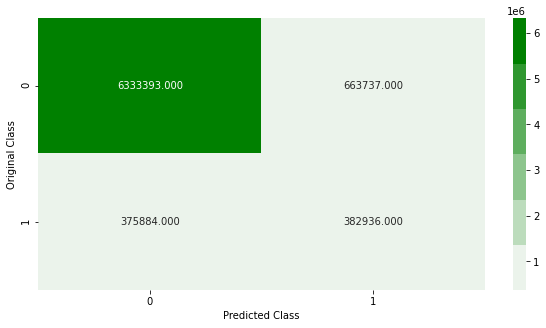

-------------------------------------------------- Precision matrix --------------------------------------------------


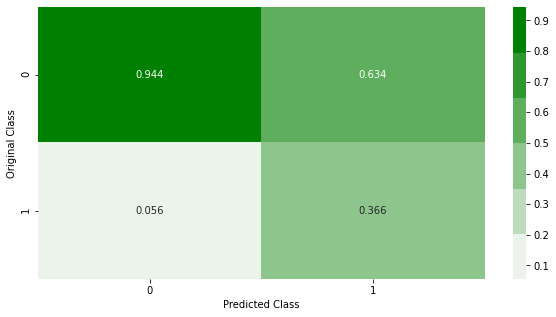

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


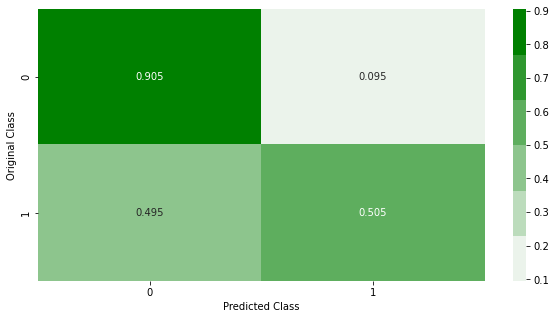

Sum of rows in precision matrix [1. 1.]


In [ ]:
#plotting confusion matrix for train data
plot_confusion_matrix(y_train,pred_train_y_c)

Number of misclassified points  13.503202260713973 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


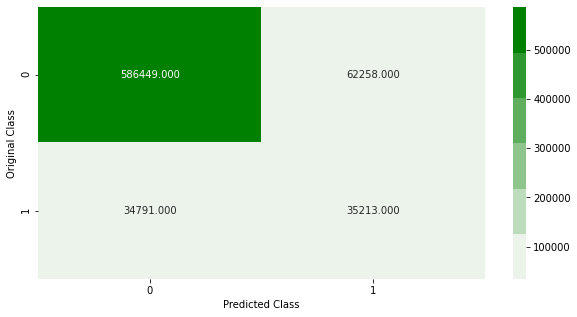

-------------------------------------------------- Precision matrix --------------------------------------------------


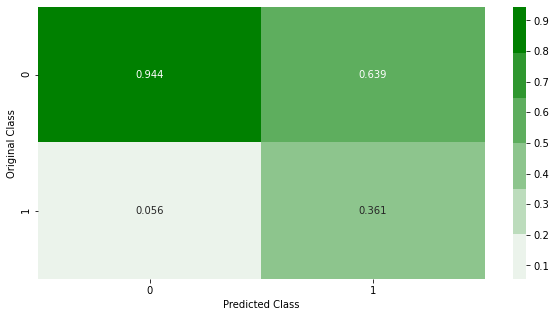

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


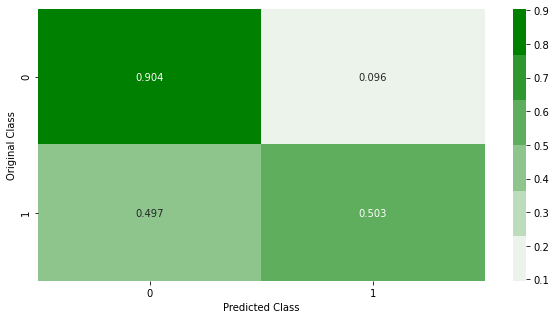

Sum of rows in precision matrix [1. 1.]


In [ ]:
#plotting confusion matrix for cv data
plot_confusion_matrix(y_cv,pred_cv_y_c)

**RandomForestClassifier**

In [ ]:
#performing hyper-parameter tuning of Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
rf_clf=RandomForestClassifier()
n_estimators=[5,10,20]
class_weight=[{0:1,1:1},{0:1,1:5},{0:1,1:10}]
max_depth=[5,10,15]
cv_f1_scores=[]
train_f1_scores=[]
for n in n_estimators:
  for w in class_weight:
    for d in max_depth:
        rf_clf=RandomForestClassifier(n_estimators=n,max_depth=d,class_weight=w,random_state=42,n_jobs=8)
        rf_clf.fit(X_train,y_train)
        pred_train_y=rf_clf.predict(X_train)
        pred_cv_y=rf_clf.predict(X_cv)
        train_f1_score=f1_score(y_train,pred_train_y)
        cv_f1_score=f1_score(y_cv,pred_cv_y)
        print('n_estimators',n,'class_weight',w,'max_depth',d,'train_f1score',train_f1_score,'cv f1score',cv_f1_score)
        train_f1_scores.append(train_f1_score)
        cv_f1_scores.append(cv_f1_score)




n_estimators 5 class_weight {0: 1, 1: 1} max_depth 5 train_f1score 0.06118291495959619 cv f1score 0.059502870154483856
n_estimators 5 class_weight {0: 1, 1: 1} max_depth 10 train_f1score 0.17372566622620866 cv f1score 0.16560191655020962
n_estimators 5 class_weight {0: 1, 1: 1} max_depth 15 train_f1score 0.2936602046738454 cv f1score 0.24688347501082522
n_estimators 5 class_weight {0: 1, 1: 5} max_depth 5 train_f1score 0.40713797275521774 cv f1score 0.4041457427521699
n_estimators 5 class_weight {0: 1, 1: 5} max_depth 10 train_f1score 0.4232208867311847 cv f1score 0.41742165376135093
n_estimators 5 class_weight {0: 1, 1: 5} max_depth 15 train_f1score 0.4593072584307258 cv f1score 0.4210497952144859
n_estimators 5 class_weight {0: 1, 1: 10} max_depth 5 train_f1score 0.3473424487906847 cv f1score 0.34363108930038844
n_estimators 5 class_weight {0: 1, 1: 10} max_depth 10 train_f1score 0.36031478979448833 cv f1score 0.3552600724616141
n_estimators 5 class_weight {0: 1, 1: 10} max_depth 15 

In [ ]:
#training Random Forest Classifier with best parameters
rf_clf=RandomForestClassifier(n_estimators=20,max_depth=15,class_weight={0:1,1:5},random_state=42,n_jobs=8)
rf_clf.fit(X_train,y_train)
pred_train_y=rf_clf.predict(X_train)
pred_cv_y=rf_clf.predict(X_cv)

In [ ]:
#storing predicted labels into data
train_data['pred_reordered']=pred_train_y
cv_data['pred_reordered']=pred_cv_y

In [ ]:
#calculating mean f1 score of train and cv data
mean_f1score(train_data),mean_f1score(cv_data)

(0.39857676115964114, 0.36632758788172687)

In [ ]:
#storing random forest classifier to disk
import pickle
rfclf_pick = "rf_clf.pkl"  

with open(rfclf_pick, 'wb') as file:  
    pickle.dump(rf_clf, file)

In [ ]:
#loading random forest classifier from disk
rf_clf=pickle.load(open(rfclf_pick,'rb'))

Number of misclassified points  13.619569491809514 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


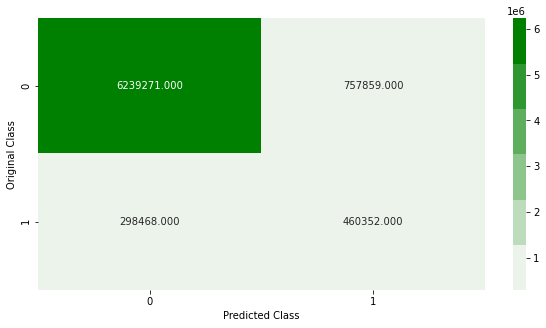

-------------------------------------------------- Precision matrix --------------------------------------------------


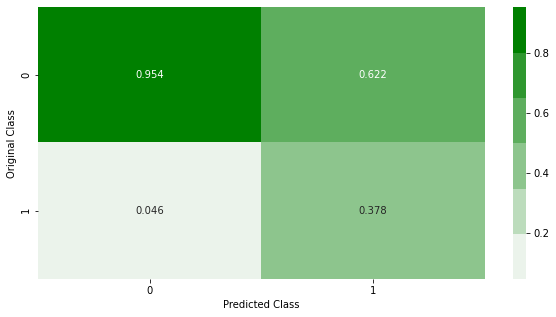

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


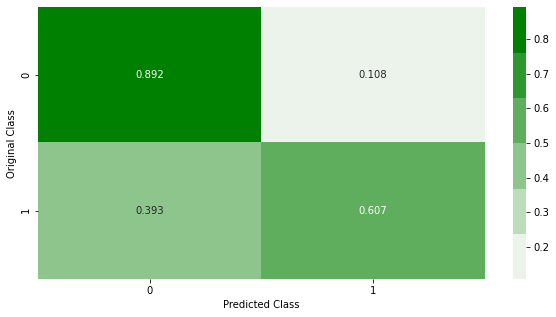

Sum of rows in precision matrix [1. 1.]


In [ ]:
#plotting confusion matrix for train data
plot_confusion_matrix(y_train,pred_train_y)

Number of misclassified points  14.51501368422078 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


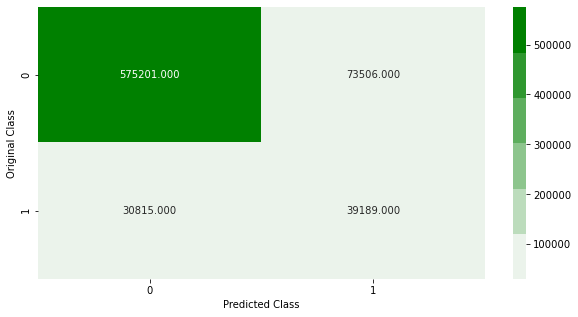

-------------------------------------------------- Precision matrix --------------------------------------------------


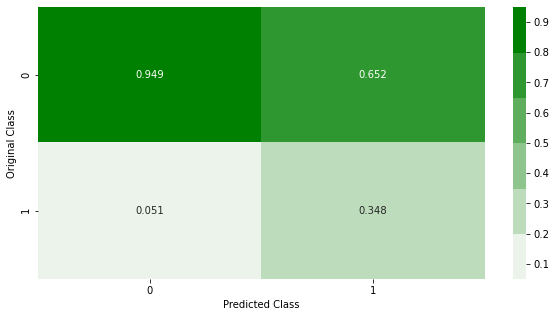

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


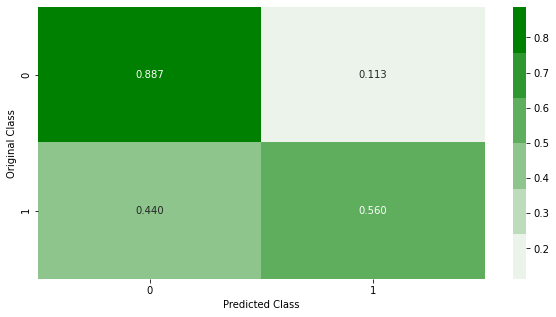

Sum of rows in precision matrix [1. 1.]


In [ ]:
#plotting confusion matrix for cv data
plot_confusion_matrix(y_cv,pred_cv_y)

# xgboost

In [ ]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
#performing hyper-parameter tuning for XGB-Classifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
x_cfl=XGBClassifier(objective='binary:logistic',eval_metric='logloss')

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[20,50,100,150],
     'max_depth':[3,5,8,10],
    'min_child_weight':[5,7,10,15],
    'colsample_bytree':[0.1,0.3,0.5,0.7,1],
    'subsample':[0.1,0.3,0.5,0.7,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=2,scoring='f1')
random_cfl1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:  6.6min
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed: 12.9min
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed: 52.2min
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed: 88.0min
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed: 101.6min
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed: 129.5min
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed: 171.2min
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 244.4min
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed: 265.0min finished


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           validate_parame

In [ ]:
#displaying best params for XGB Classifier
random_cfl1.best_params_

{'subsample': 0.1,
 'n_estimators': 100,
 'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.1,
 'colsample_bytree': 0.5}

In [ ]:
#training XGBClassifier with best hyper parameters
x_cfl=XGBClassifier(subsample=0.1,n_estimators=100,min_child_weight=7,max_depth=5,learning_rate=0.1,colsample_bytree=0.5,n_jobs=2)
x_cfl.fit(X_train,y_train)
pred_train_y=x_cfl.predict(X_train)
pred_cv_y=x_cfl.predict(X_cv)

[03:36:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
#calculating raw f1 score for train and cv data
f1_score(y_train,pred_train_y),f1_score(y_cv,pred_cv_y)

(0.2866803523697004, 0.2802427125662118)

In [ ]:
#saving xgbclassifier to disk
import pickle
xcfl_pick = "xgb_clf.pkl"  

with open(xcfl_pick, 'wb') as file:  
    pickle.dump(x_cfl, file)

In [ ]:
#predicting label probabilities of train and cv dat
pred_train_y1=x_cfl.predict_proba(X_train)
pred_cv_y1=x_cfl.predict_proba(X_cv)

In [ ]:
#finding threshold that maximizes both train and cv data
p_range=[0.1*p for p in range(0,11,1)]
for p in p_range:
    train_data['pred_reordered']=(pred_train_y1[:,1]>=p)
    cv_data['pred_reordered']=(pred_cv_y1[:,1]>=p)
    print('threshold',p,'train f1 score',mean_f1score(train_data),'cv f1 score',mean_f1score(cv_data) )


threshold 0.0 train f1 score 0.21548095839949163 cv f1 score 0.21454006828738478
threshold 0.1 train f1 score 0.34412735535248756 cv f1 score 0.34336713621736153
threshold 0.2 train f1 score 0.3631723202865629 cv f1 score 0.3626903507489706
threshold 0.30000000000000004 train f1 score 0.32426637299470296 cv f1 score 0.32397412850022045
threshold 0.4 train f1 score 0.266164721995603 cv f1 score 0.2676936706877918
threshold 0.5 train f1 score 0.20023726705391665 cv f1 score 0.20122880285505243
threshold 0.6000000000000001 train f1 score 0.12610890920299211 cv f1 score 0.12486282245053063
threshold 0.7000000000000001 train f1 score 0.051247446398458366 cv f1 score 0.04911530028486646
threshold 0.8 train f1 score 0.005945451859721213 cv f1 score 0.005286894347273476
threshold 0.9 train f1 score 4.848406058593612e-05 cv f1 score 8.11036585860388e-06
threshold 1.0 train f1 score 0.0 cv f1 score 0.0


In [ ]:
#converting probabilities to labels based on best threshold
train_data['pred_reordered']=(pred_train_y1[:,1]>=0.2)
cv_data['pred_reordered']=(pred_cv_y1[:,1]>=0.2)

In [ ]:
#calculating mean f1 score for train data and cv data
mean_f1score(train_data),mean_f1score(cv_data)

(0.3631723202865629, 0.3626903507489706)

Number of misclassified points  9.076747529316203 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


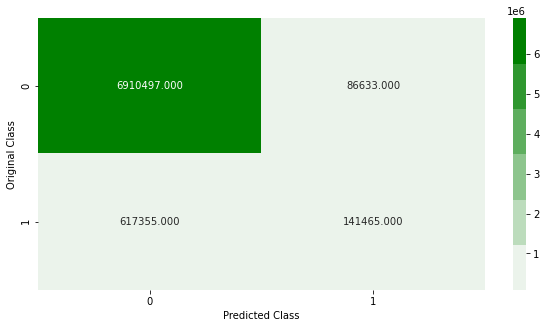

-------------------------------------------------- Precision matrix --------------------------------------------------


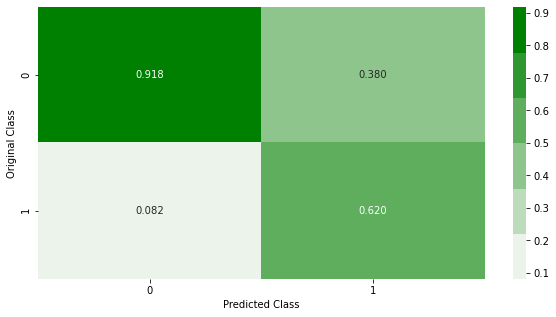

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


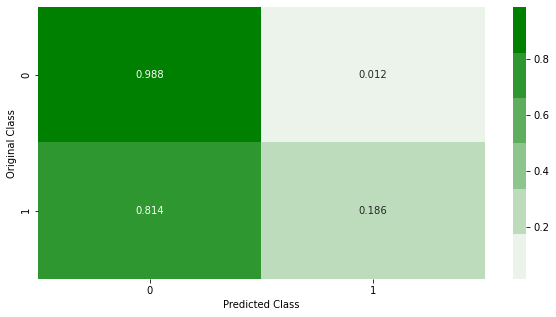

Sum of rows in precision matrix [1. 1.]


In [ ]:
#plotting confusion matrix for train data
plot_confusion_matrix(y_train,pred_train_y)

Number of misclassified points  9.093919530938027 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


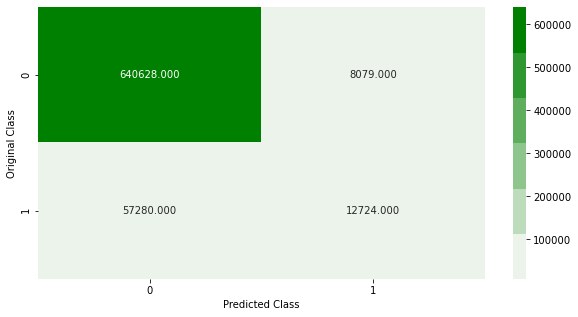

-------------------------------------------------- Precision matrix --------------------------------------------------


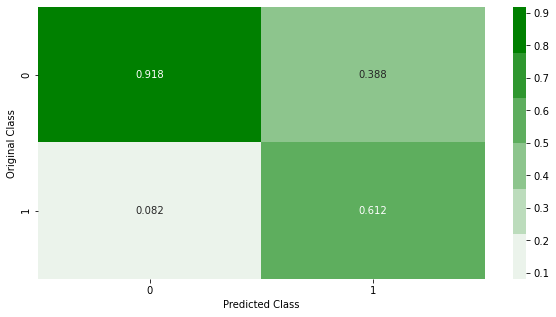

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


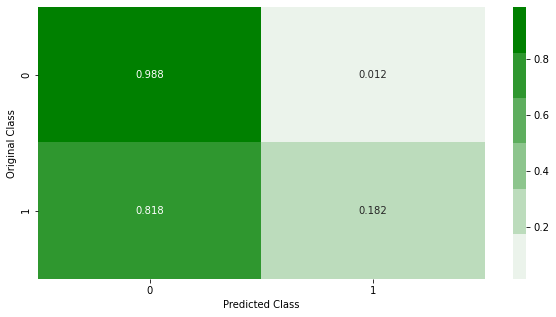

Sum of rows in precision matrix [1. 1.]


In [ ]:
#plotting confusion matrix for cv data
plot_confusion_matrix(y_cv,pred_cv_y)

# lightbgm

In [ ]:
#performing hyper-parameter tuning on LGBM Classifier
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[20,50,100,150],
     'max_depth':[3,5,8,10],
     'num_leaves':[31,62,93],
     'class_weight':[{0:1,1:1},{0:1,1:5},{0:1,1:10}],
    'colsample_bytree':[0.1,0.3,0.5,0.7,1],
    'subsample':[0.1,0.3,0.5,0.7,1]
}
lgbm_cfl1=RandomizedSearchCV(lgbm,param_distributions=prams,verbose=10,n_jobs=2,scoring='f1')
lgbm_cfl1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:  3.5min
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:  6.9min
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed: 19.5min
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed: 23.3min
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed: 28.1min
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed: 54.1min
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed: 69.5min
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 79.2min
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed: 82.1min finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


RandomizedSearchCV(estimator=LGBMClassifier(), n_jobs=2,
                   param_distributions={'class_weight': [{0: 1, 1: 1},
                                                         {0: 1, 1: 5},
                                                         {0: 1, 1: 10}],
                                        'colsample_bytree': [0.1, 0.3, 0.5, 0.7,
                                                             1],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.15, 0.2],
                                        'max_depth': [3, 5, 8, 10],
                                        'n_estimators': [20, 50, 100, 150],
                                        'num_leaves': [31, 62, 93],
                                        'subsample': [0.1, 0.3, 0.5, 0.7, 1]},
                   scoring='f1', verbose=10)

In [ ]:
#displaying best params for lgbm classifier
lgbm_cfl1.best_params_

{'subsample': 0.3,
 'num_leaves': 31,
 'n_estimators': 150,
 'max_depth': 8,
 'learning_rate': 0.05,
 'colsample_bytree': 0.3,
 'class_weight': {0: 1, 1: 5}}

In [ ]:
#training LGBM Classifier with best parameters
lgbm=LGBMClassifier(n_jobs=2,subsample=0.3,num_leaves=31,n_estimators=150,max_depth=8,learning_rate=0.04,colsample_bytree=0.3,class_weight={0:1,1:5})
lgbm.fit(X_train,y_train)

LGBMClassifier(class_weight={0: 1, 1: 5}, colsample_bytree=0.3,
               learning_rate=0.04, max_depth=8, n_estimators=150, n_jobs=2,
               subsample=0.3)

In [ ]:
#predicting labels for train and cv data and calculating raw f1 score
pred_train_y=lgbm.predict(X_train)
pred_cv_y=lgbm.predict(X_cv)
f1_score(y_train,pred_train_y),f1_score(y_cv,pred_cv_y)

(0.43037001737098574, 0.42580437446773156)

In [ ]:
#calculating mean f1 score for train and cv data
train_data['pred_reordered']=pred_train_y
cv_data['pred_reordered']=pred_cv_y
print('train f1 score',mean_f1score(train_data),'cv f1 score',mean_f1score(cv_data) )


train f1 score 0.36606296662388665 cv f1 score 0.3651560456449692


In [ ]:
#saving lgbm classifier to disk
import pickle
lbgm_pick = "lbgm_clf.pkl"  

with open(lbgm_pick, 'wb') as file:  
    pickle.dump(lgbm, file)


Number of misclassified points  15.288391492982806 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


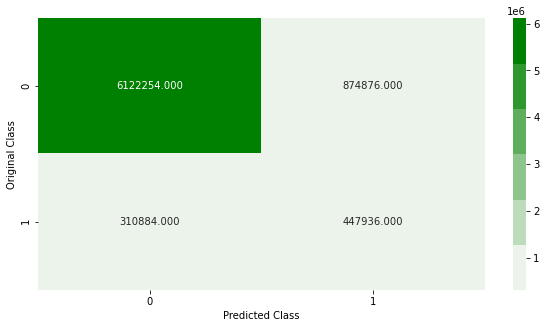

-------------------------------------------------- Precision matrix --------------------------------------------------


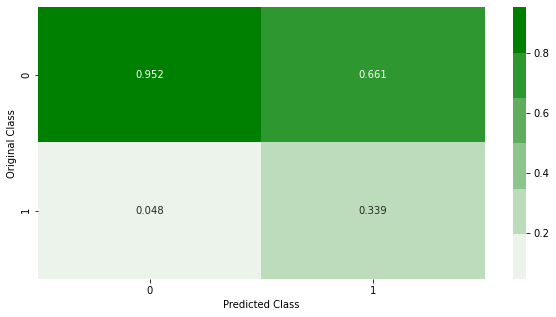

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


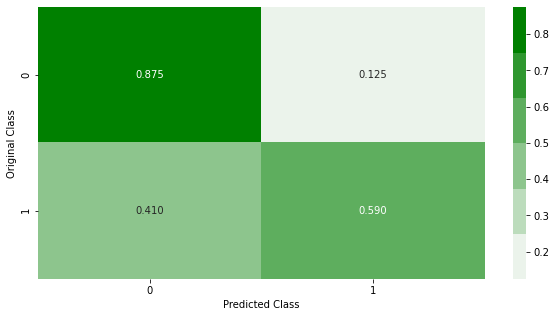

Sum of rows in precision matrix [1. 1.]


In [ ]:
#plotting confusion matrix of train data
plot_confusion_matrix(y_train,pred_train_y)

Number of misclassified points  15.385043501490864 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


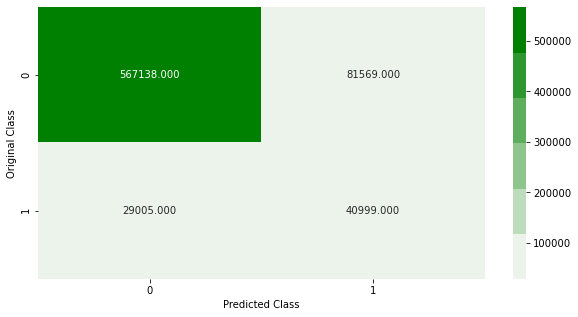

-------------------------------------------------- Precision matrix --------------------------------------------------


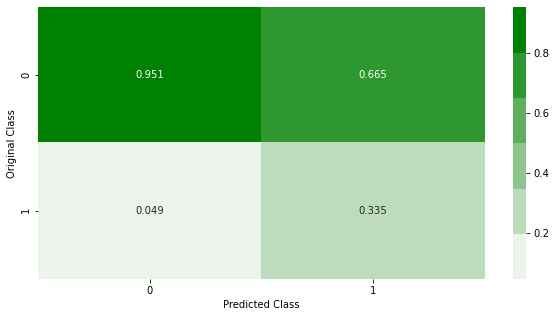

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


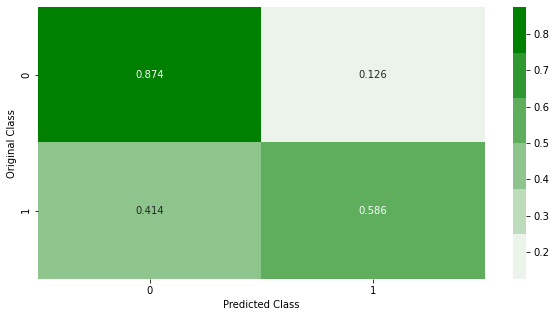

Sum of rows in precision matrix [1. 1.]


In [ ]:
#plotting confusion matrix on cv data
plot_confusion_matrix(y_cv,pred_cv_y)

**Adaboost**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
def best_mean_f1_score(pred_train_y,pred_cv_y):
  ''' function to calculate best mean f1 score for train data and cv data after trying all thresholds'''
  p_range=[0.1*p for p in range(0,11,1)]
  train_mean_f1scores=[]
  cv_mean_f1scores=[]
  for p in p_range:
    train_data['pred_reordered']=(pred_train_y[:,1]>=p)
    cv_data['pred_reordered']=(pred_cv_y[:,1]>=p)
    train_mean_f1scores.append(mean_f1score(train_data))
    cv_mean_f1scores.append(mean_f1score(cv_data))
  print('threshold','train f1 score',p_range[np.argmax(train_mean_f1scores)],max(train_mean_f1scores))
  print('threshold','cv f1 score',p_range[np.argmax(cv_mean_f1scores)],max(cv_mean_f1scores))
  

In [ ]:
#performing hyper-parameter tuning of Adaboost Classifier
from sklearn.metrics import f1_score
n_estimators=[1,3,5,10]
learning_rates=[0.1,0.5,1,1.5,2,2.5]
cv_f1_scores=[]
train_f1_scores=[]
for n in n_estimators:
  for l in learning_rates:
        ada_clf=AdaBoostClassifier(random_state=42,n_estimators=n,learning_rate=l)
        ada_clf.fit(X_train,y_train)
        pred_train_y=ada_clf.predict_proba(X_train)
        pred_cv_y=ada_clf.predict_proba(X_cv)
        print('n_estimator',n,'learning_rate',l)
        best_mean_f1_score(pred_train_y,pred_cv_y)
       




n_estimator 1 learning_rate 0.1
threshold train f1 score 0.1 0.3219098702012908
threshold cv f1 score 0.1 0.32393800996549627
n_estimator 1 learning_rate 0.5
threshold train f1 score 0.1 0.3219098702012908
threshold cv f1 score 0.1 0.32393800996549627
n_estimator 1 learning_rate 1
threshold train f1 score 0.1 0.3219098702012908
threshold cv f1 score 0.1 0.32393800996549627
n_estimator 1 learning_rate 1.5
threshold train f1 score 0.1 0.3219098702012908
threshold cv f1 score 0.1 0.32393800996549627
n_estimator 1 learning_rate 2
threshold train f1 score 0.1 0.3219098702012908
threshold cv f1 score 0.1 0.32393800996549627
n_estimator 1 learning_rate 2.5
threshold train f1 score 0.1 0.3219098702012908
threshold cv f1 score 0.1 0.32393800996549627
n_estimator 3 learning_rate 0.1
threshold train f1 score 0.2 0.3219098702012908
threshold cv f1 score 0.2 0.32393800996549627
n_estimator 3 learning_rate 0.5
threshold train f1 score 0.2 0.331831699373331
threshold cv f1 score 0.2 0.333908781599489

In [ ]:
#training adaboost classifier with best hyper parameters
ada_clf=AdaBoostClassifier(random_state=42,n_estimators=10,learning_rate=0.5)
ada_clf.fit(X_train,y_train)

In [ ]:
#converting probabilities to labels with best threshold
pred_train_y=(ada_clf.predict_proba(X_train)[:,1]>=0.4)
pred_cv_y=(ada_clf.predict_proba(X_cv)[:,1]>=0.4)

In [ ]:
#calculating mean f1 score for train and cv data
train_data['pred_reordered']=pred_train_y
cv_data['pred_reordered']=pred_cv_y
print('train f1 score',mean_f1score(train_data),'cv f1 score',mean_f1score(cv_data) )


train f1 score 0.3406075406050733 cv f1 score 0.3413132651120193


In [ ]:
#saving adaboost classifier to disk
import pickle
ada_pick = "ada_clf.pkl"  

with open(ada_pick, 'wb') as file:  
    pickle.dump(ada_clf, file)


Number of misclassified points  22.94666675262218 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


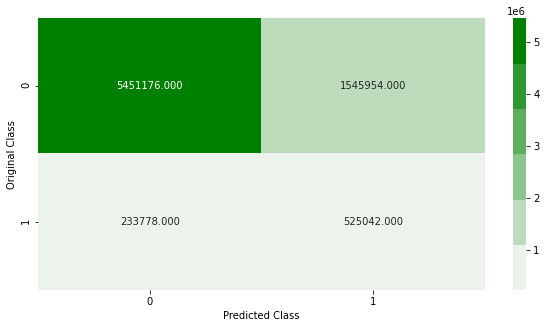

-------------------------------------------------- Precision matrix --------------------------------------------------


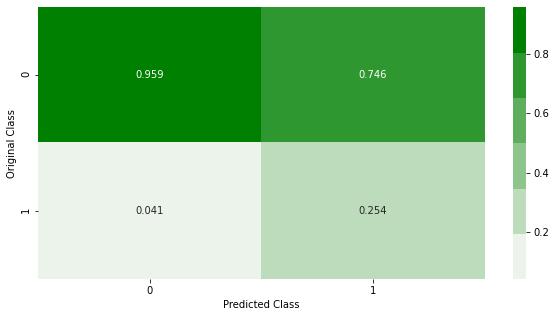

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


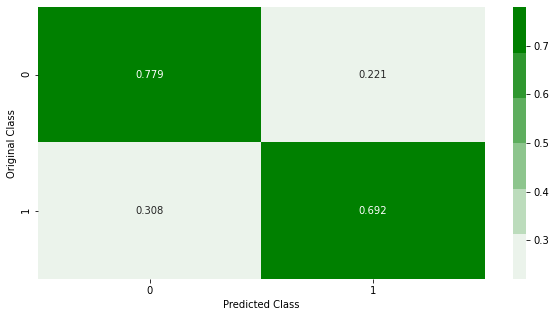

Sum of rows in precision matrix [1. 1.]


In [ ]:
#plotting confusion matrix for train data
plot_confusion_matrix(y_train,pred_train_y)

Number of misclassified points  23.13280303209496 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


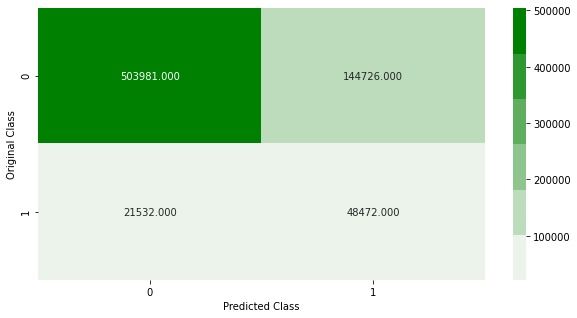

-------------------------------------------------- Precision matrix --------------------------------------------------


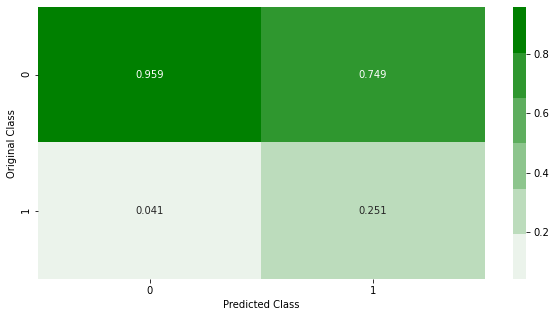

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


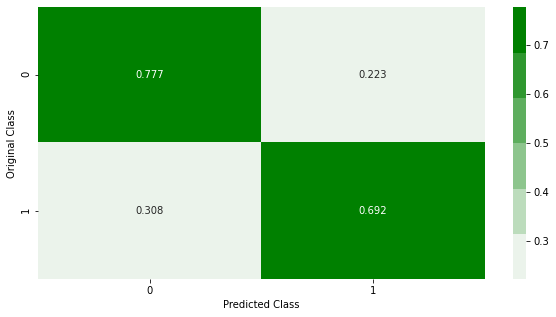

Sum of rows in precision matrix [1. 1.]


In [ ]:
#plotting confusion matrix of cv data
plot_confusion_matrix(y_cv,pred_cv_y)

**Neural Network Models**

**NN model with 7 dense layers**

In [19]:
def best_mean_f1_score_tf(pred_train_y,pred_cv_y):
  ''' function to calculate best mean f1 score for train data and cv data after trying all thresholds'''
  p_range=[0.1*p for p in range(0,11,1)]
  train_mean_f1scores=[]
  cv_mean_f1scores=[]
  for p in p_range:
    train_data['pred_reordered']=(pred_train_y>=p)
    cv_data['pred_reordered']=(pred_cv_y>=p)
    train_mean_f1scores.append(mean_f1score(train_data))
    cv_mean_f1scores.append(mean_f1score(cv_data))
  print('threshold','train f1 score',p_range[np.argmax(train_mean_f1scores)],max(train_mean_f1scores))
  print('threshold','cv f1 score',p_range[np.argmax(cv_mean_f1scores)],max(cv_mean_f1scores))
  return max(cv_mean_f1scores)
  

In [57]:
#defining the model
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense
input_layer=Input(shape=(len(X_train.columns)))
d1=Dense(units=100,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='d1')(input_layer)
d2=Dense(units=100,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='d2')(d1)
d3=Dense(units=100,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='d3')(d2)
d4=Dense(units=100,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='d4')(d3)
d5=Dense(units=100,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='d5')(d4)
d6=Dense(units=100,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='d6')(d5)
output_layer=Dense(units=1,activation='sigmoid',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='output')(d6)
model_7layer = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_7layer.summary()



Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 47)]              0         
_________________________________________________________________
d1 (Dense)                   (None, 100)               4800      
_________________________________________________________________
d2 (Dense)                   (None, 100)               10100     
_________________________________________________________________
d3 (Dense)                   (None, 100)               10100     
_________________________________________________________________
d4 (Dense)                   (None, 100)               10100     
_________________________________________________________________
d5 (Dense)                   (None, 100)               10100     
_________________________________________________________________
d6 (Dense)                   (None, 100)               1010

In [28]:
#creating folder to store trained models
mkdir nn_models

In [58]:
#defining the custom callback for model7
from sklearn.metrics import f1_score
class custom_callback(tf.keras.callbacks.Callback):
  def __init__(self):
    super()
    self.max_score=0.30
        

  def on_epoch_end(self, epoch, logs={}):
        #on every epoch end we are storing the validation accuracy in the history dict
        #checking if we have any nan values across our weights
        is_nan_values=[]
        for i in self.model.get_weights():
          is_nan_values.append(np.isnan(i).any())

        #stopping the model training if any weights have nan
        if np.array(is_nan_values).any():
          self.model.stop_training = True

        #print f1 score for every epoch
        y_preds_train=self.model.predict(X_train,batch_size=10000)
        y_preds_cv=self.model.predict(X_cv,batch_size=10000)
        gc.collect()
        cv_mean_f1=best_mean_f1_score_tf(y_preds_train,y_preds_cv)
        if cv_mean_f1>self.max_score:
          self.max_score=cv_mean_f1

          self.model.save('nn_models/layer7_model_f1'+str(cv_mean_f1))
        gc.collect()
      
        
 

In [59]:
#compiling the model
model_7layer.compile(optimizer=tf.keras.optimizers.Adam(lr=0.005),loss='binary_crossentropy',metrics=['accuracy'],run_eagerly=True)


In [60]:
#training the model
model_7layer.fit(X_train,y_train.astype(np.float32),batch_size=10000,epochs=30,callbacks=[custom_callback()])

Epoch 1/30
776/776 [==============================] - 17s 22ms/step - loss: 0.2724 - accuracy: 0.8987
threshold train f1 score 0.2 0.3596840413314548
threshold cv f1 score 0.2 0.3582853065415321
INFO:tensorflow:Assets written to: nn_models/layer7_model_f10.3582853065415321/assets
Epoch 2/30
776/776 [==============================] - 17s 22ms/step - loss: 0.2478 - accuracy: 0.9087
threshold train f1 score 0.2 0.35776699432700715
threshold cv f1 score 0.2 0.35721270818169865
Epoch 3/30
776/776 [==============================] - 17s 22ms/step - loss: 0.2469 - accuracy: 0.9090
threshold train f1 score 0.2 0.3564765403664173
threshold cv f1 score 0.2 0.3560588366254019
Epoch 4/30
776/776 [==============================] - 17s 22ms/step - loss: 0.2462 - accuracy: 0.9093
threshold train f1 score 0.2 0.3626642613598182
threshold cv f1 score 0.2 0.3609134351166644
INFO:tensorflow:Assets written to: nn_models/layer7_model_f10.3609134351166644/assets
Epoch 5/30
776/776 [==========================

In [63]:
#evaluating the best model with best threshold 
best_model=tf.keras.models.load_model('nn_models/layer7_model_f10.36402924385773194')
pred_train_y=(best_model.predict(X_train,batch_size=10000)>=0.2)
pred_cv_y=(best_model.predict(X_cv,batch_size=10000)>=0.2)
train_data['pred_reordered']=pred_train_y
cv_data['pred_reordered']=pred_cv_y
train_f1_score=mean_f1score(train_data)
cv_f1_score=mean_f1score(cv_data)
print('train f1 score',train_f1_score,'cv_f1_score',cv_f1_score)

train f1 score 0.36431955418342366 cv_f1_score 0.36402924385773194


Number of misclassified points  13.864903719080191 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


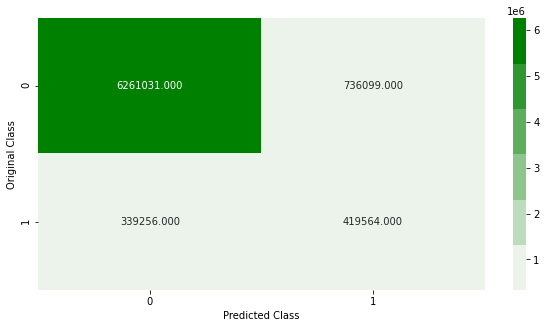

-------------------------------------------------- Precision matrix --------------------------------------------------


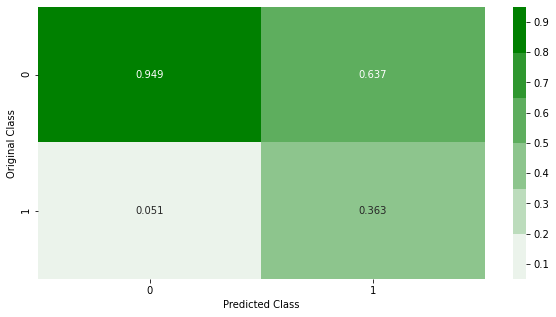

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


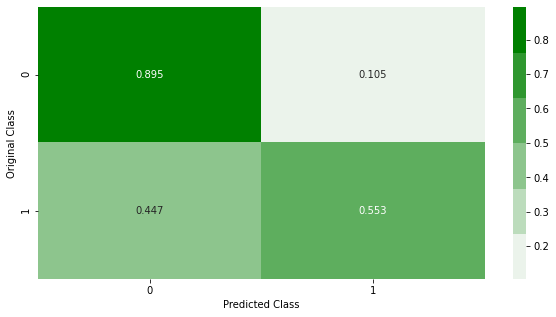

Sum of rows in precision matrix [1. 1.]


In [64]:
#plotting confusion matrix for train data
plot_confusion_matrix(y_train,pred_train_y)

Number of misclassified points  13.92534690577993 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


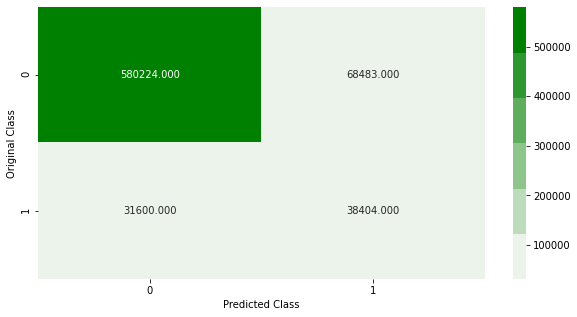

-------------------------------------------------- Precision matrix --------------------------------------------------


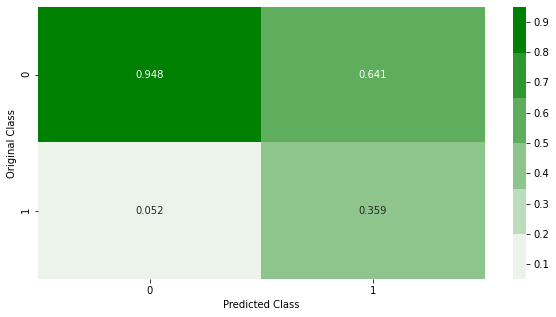

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


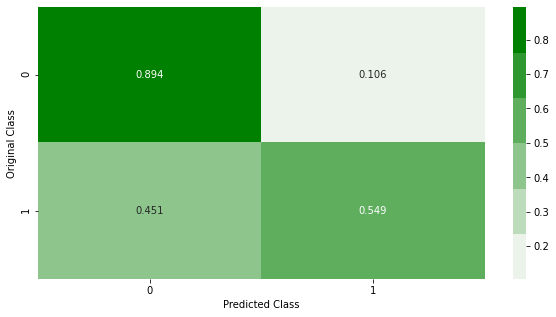

Sum of rows in precision matrix [1. 1.]


In [65]:
#plotting confusion matrix for cv data
plot_confusion_matrix(y_cv,pred_cv_y)

**CNN Model**

In [24]:
#creating cnn model
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Concatenate,Conv1D,MaxPool1D,Dropout
input_layer=Input(shape=(len(X_train.columns),1))
conv1a=Conv1D(128, 3, activation='relu')(input_layer)
conv1b=Conv1D(128, 5, activation='relu')(input_layer)
conv1c=Conv1D(128, 7, activation='relu')(input_layer)
concat1=Concatenate(axis=1)([conv1a, conv1b, conv1c])
max1=MaxPool1D(pool_size=2,strides=1, padding='valid')(concat1)
conv2a=Conv1D(64, 3, activation='relu')(max1)
conv2b=Conv1D(64, 5, activation='relu')(max1)
conv2c=Conv1D(64, 7, activation='relu')(max1)
concat2=Concatenate(axis=1)([conv2a, conv2b, conv2c])
max2=MaxPool1D(pool_size=2,strides=1, padding='valid')(concat2)
conv3a=Conv1D(16, 3, activation='relu')(max2)
flat=Flatten()(conv3a)
drp=Dropout(.2)(flat)
d1=Dense(units=50,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='FC1')(drp)
output_layer=Dense(units=1,activation='sigmoid',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3),name='Output')(d1)
conv_model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
conv_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 47, 1)]      0                                            
__________________________________________________________________________________________________
conv1d_14 (Conv1D)              (None, 45, 128)      512         input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_15 (Conv1D)              (None, 43, 128)      768         input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_16 (Conv1D)              (None, 41, 128)      1024        input_3[0][0]                    
____________________________________________________________________________________________

In [25]:
#defining the custom callback for model7
from sklearn.metrics import f1_score
class custom_callback(tf.keras.callbacks.Callback):
  def __init__(self):
    super()
    self.max_score=0.30
        

  def on_epoch_end(self, epoch, logs={}):
        #on every epoch end we are storing the validation accuracy in the history dict
        #checking if we have any nan values across our weights
        is_nan_values=[]
        for i in self.model.get_weights():
          is_nan_values.append(np.isnan(i).any())

        #stopping the model training if any weights have nan
        if np.array(is_nan_values).any():
          self.model.stop_training = True

        #print f1 score for every epoch
        y_preds_train=self.model.predict(X_train,batch_size=1000)
        y_preds_cv=self.model.predict(X_cv,batch_size=1000)
        gc.collect()
        cv_mean_f1=best_mean_f1_score_tf(y_preds_train,y_preds_cv)
        if cv_mean_f1>self.max_score:
          self.max_score=cv_mean_f1

          self.model.save('nn_models/conv_model_f1'+str(cv_mean_f1))
        gc.collect()
      
        
 

In [26]:
#compiling the model
conv_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'],run_eagerly=True)


In [27]:
#training the model
# np.reshape(X_train,newshape=(X_train.shape[0],X_train.shape[1],1)),y_train.astype(np.float32)
conv_model.fit(X_train,y_train.astype(np.float32),batch_size=1000,epochs=10,callbacks=[custom_callback()])

Epoch 1/10
7756/7756 [==============================] - 422s 54ms/step - loss: 0.2545 - accuracy: 0.9060
threshold train f1 score 0.2 0.35863272180507766
threshold cv f1 score 0.2 0.35857014676771215
INFO:tensorflow:Assets written to: nn_models/conv_model_f10.35857014676771215/assets
Epoch 2/10
7756/7756 [==============================] - 420s 54ms/step - loss: 0.2477 - accuracy: 0.9086
threshold train f1 score 0.2 0.36087938442078976
threshold cv f1 score 0.2 0.36062013826644107
INFO:tensorflow:Assets written to: nn_models/conv_model_f10.36062013826644107/assets
Epoch 3/10
7756/7756 [==============================] - 420s 54ms/step - loss: 0.2469 - accuracy: 0.9091
threshold train f1 score 0.2 0.36569859248443787
threshold cv f1 score 0.2 0.36447325900646405
INFO:tensorflow:Assets written to: nn_models/conv_model_f10.36447325900646405/assets
Epoch 4/10
7756/7756 [==============================] - 421s 54ms/step - loss: 0.2460 - accuracy: 0.9094
threshold train f1 score 0.2 0.366185891

In [30]:
#evaluating with best model and best threshold
best_model=tf.keras.models.load_model('nn_models/conv_model_f10.3654403235929674')
pred_train_y=(best_model.predict(X_train,batch_size=1000)>=0.2)
pred_cv_y=(best_model.predict(X_cv,batch_size=1000)>=0.2)
train_data['pred_reordered']=pred_train_y
cv_data['pred_reordered']=pred_cv_y
train_f1_score=mean_f1score(train_data)
cv_f1_score=mean_f1score(cv_data)
print('train f1 score',train_f1_score,'cv_f1_score',cv_f1_score)


train f1 score 0.36697921238949 cv_f1_score 0.3654403235929674


Number of misclassified points  14.062004009824717 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


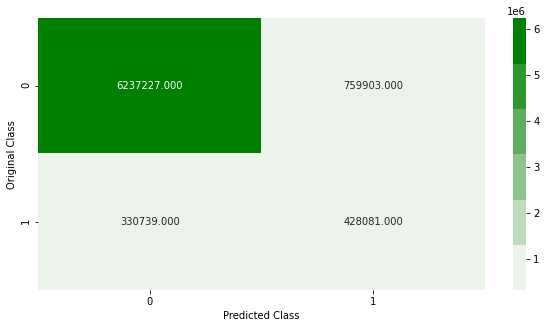

-------------------------------------------------- Precision matrix --------------------------------------------------


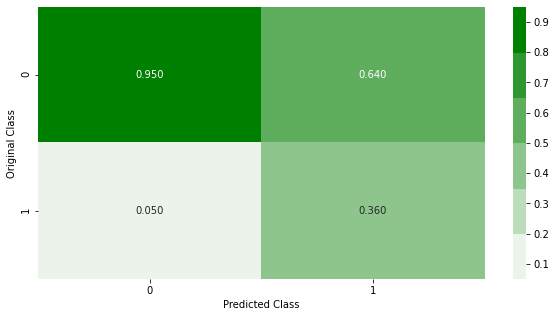

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


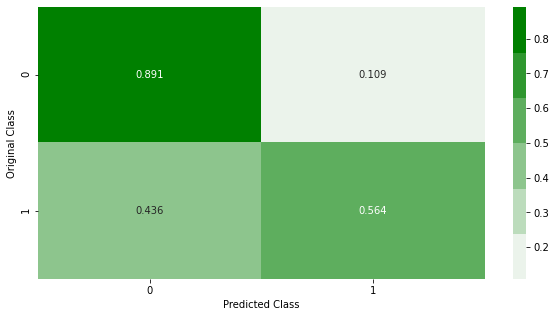

Sum of rows in precision matrix [1. 1.]


In [31]:
#plotting confusion matrix of train data
plot_confusion_matrix(y_train,pred_train_y)

Number of misclassified points  14.181082521347246 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


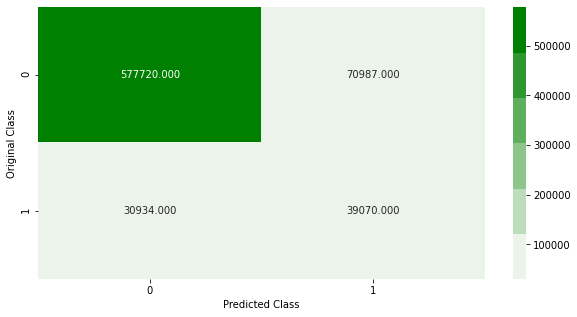

-------------------------------------------------- Precision matrix --------------------------------------------------


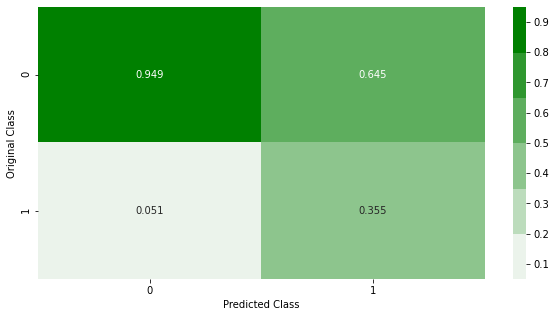

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


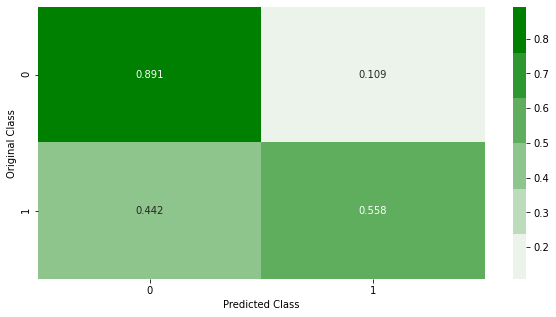

Sum of rows in precision matrix [1. 1.]


In [32]:
#plotting confusion matrix of cv data
plot_confusion_matrix(y_cv,pred_cv_y)

# Summary

In [33]:
#displaying model scores
from beautifultable import BeautifulTable


headers=['Model','Train mean f1 score', ' Cv mean f1 score']
summary_data = [['logistic regression','0.3450','0.3452'],
                ['Random Forest Classifier','0.398576','0.36632'],
                ['XGB Classifier','0.36317','0.36269'],
                ['LGBM Classifier','0.36606','0.36515'],
                ['Adaboost Classifier','0.340607','0.341313'],
                ['Neural Network with 7 dense layers','0.36431955418342366','0.36402924385773194'],
                ['CNN model','0.36697921238949','0.3654403235929674']]



table=BeautifulTable(max_width=110)
table.columns.header=headers


for row in summary_data:
    table.rows.append(row)
    
print(table)

+------------------------------------+---------------------+-------------------+
|               Model                | Train mean f1 score |  Cv mean f1 score |
+------------------------------------+---------------------+-------------------+
|        logistic regression         |        0.345        |       0.345       |
+------------------------------------+---------------------+-------------------+
|      Random Forest Classifier      |        0.399        |       0.366       |
+------------------------------------+---------------------+-------------------+
|           XGB Classifier           |        0.363        |       0.363       |
+------------------------------------+---------------------+-------------------+
|          LGBM Classifier           |        0.366        |       0.365       |
+------------------------------------+---------------------+-------------------+
|        Adaboost Classifier         |        0.341        |       0.341       |
+---------------------------

We tried five different models with hyper parameter tuning. Out of all the four models, Random Forest Classifier did well compared to the rest with close margin with LGBM Classifier and CNN model